# Laboratorio di Fisica 1 modulo 2 | R7: il Pendolo Fisico

In [1]:
# %matplotlib widget
# Setup
import math
from dataclasses import dataclass
import matplotlib.pyplot as plt
# plt.rcParams['figure.dpi'] = 150
# plt.rcParams['figure.figsize'] = [15, 5]
# import numpy as np
import pandas as pd
import sympy as sp
# import numba
sp.init_printing(use_latex=True)

@dataclass(frozen=True, slots=True)
class d:
    best: float
    delta: float
    @property
    def delta_rel(self) -> float: return self.delta / abs(self.best)
    @classmethod
    def from_delta_rel(cls, best: float, delta_rel: float) -> "d": return cls(best, delta_rel * abs(best))
    def __add__(self, other: "d | float"):
        return d(self.best + _best(other), math.sqrt(_delta(self)**2 + _delta(other)**2))
    def __sub__(self, other: "d | float"):
        return d(self.best - _best(other), math.sqrt(_delta(self)**2 + _delta(other)**2))
    def __neg__(self): return d(-self.best, self.delta)
    def __pos__(self): return self
    def __mul__(self, other: "d | float"):
        return d.from_delta_rel(self.best * _best(other), math.sqrt(self.delta_rel**2 + other.delta_rel**2) if isinstance(other, d) else self.delta_rel)
    def __truediv__(self, other: "d | float"): return d.from_delta_rel(self.best / _best(other), math.sqrt(self.delta_rel**2 + other.delta_rel**2) if isinstance(other, d) else self.delta_rel)
    def __rdiv__(self, other: "d | float"): return d.from_delta_rel(_best(other) / self.best, math.sqrt(self.delta_rel**2 + other.delta_rel**2) if isinstance(other, d) else self.delta_rel)
    def __pow__(self, other: float): return d.from_delta_rel(self.best ** other, abs(other * self.delta_rel))
    __radd__ = __add__
    __rmul__ = __mul__

def _best(x: d | float): return x.best if isinstance(x, d) else x
def _delta(x: d | float): return x.delta if isinstance(x, d) else 0

$$\omega^2 = \frac{m d g}{I}$$

$$g = \frac{4\pi^2 I_\text{tot}}{M x_{CM} T^2}$$

$$M = m_\text{rotore} + m_\text{asta} + m_\text{campioni}$$

$$M x_\text{CM} = m_\text{asta} \frac{L_\text{asta} + \varnothing_\text{rotore}}{2} + \sum_{i} m_i \left(d_i + \frac{h_i - \varnothing_\text{rotore}}{2}\right)$$


$$I = I_\text{CM} + M D^2$$

$$I_\text{tot} = I_\text{asta} + I_\text{rotore} + \sum_{i} I_i$$

$$I_\text{tot} = I_\text{asta,CM} + m_\text{asta} \left(\frac{L_\text{asta} + \varnothing_\text{rotore}}{2}\right)^2 + I_\text{rotore} + \sum_{i} \left(I_{i,CM} + m_i \left(d_i + \frac{h_i - \varnothing_\text{rotore}}{2}\right)^2\right)$$


In [2]:
f = d | float

def Icil(M: f, H: f, R: f, r: f): return M * (R**2 + r**2) / 4 + M * H**2 / 12
def HS(Icm: f, M: f, D: f): return Icm + M * D**2
# Rotore
Drotore = d(13.41, 0.01)/1000  # m
Mrotore = d(22.4, 0.4)/1000  # kg
Irotore = d(5.8, 0.1)*1e-7  # kg m^2
# Asta
Masta = d(45.82, 0.01)/1000  # ± 0.01 g
Dasta = d(5.94, 0.01)/1000   # ± 0.01 mm
Lasta = d(60.0, 0.1)/100  # ± 0.1 cm
Iasta = HS(Icil(Masta, Lasta, Dasta/2, 0.0), Masta, (Lasta + Drotore)/2)  # kg m^2
# Masse
Mp = {
    1: d(115.95, 0.01)/1000,  # ± 0.01 g
    2: d(115.86, 0.01)/1000,  # ± 0.01 g
    3: d(71.46, 0.01)/1000,  # ± 0.01 g
}
Hp = {
    1: d(19.93, 0.01)/1000,  # ± 0.01 mm
    2: d(19.89, 0.01)/1000,  # ± 0.01 mm
    3: d(12.08, 0.01)/1000,  # ± 0.01 mm
}
Dp = d(29.95, 0.05)/1000  # ± 0.05 mm  # diametro esterno
dp = d(6.20, 0.05)/1000  # ± 0.05 mm  # diametro interno
#

runs = [{k: d(v, 0.1/100) for k, v in x.items()} for x in [{}, {}, {}, {
    1: 12.7/100, # ± 0.1 cm # 126.55 ± 0.05 mm
}, {
    1: 31.7/100, # ± 0.1 cm
}, {
    1: 51.7/100, # ± 0.1 cm
}, {
    3: 13.9/100, # ± 0.1 cm  # distanza
}, {
    3: 23.9/100, # ± 0.1 cm  # distanza
}, {
    3: 40.3/100, # ± 0.1 cm  # distanza
}, {
    1: 35.6/100, # ± 0.1 cm  # distanza
    3: 25.0/100, # ± 0.1 cm  # distanza
}, {
    1: 25.2/100, # ± 0.1 cm  # distanza
    3: 12.1/100, # ± 0.1 cm  # distanza
}, {
    1: 19.1/100, # ± 0.1 cm  # distanza
    3: 49.1/100, # ± 0.1 cm  # distanza
}, {
    1: 14.1/100, # ± 0.1 cm  # distanza
    2: 26.1/100, # ± 0.1 cm  # distanza
}, {
    1: 15.4/100, # ± 0.1 cm  # distanza
    2: 42.3/100, # ± 0.1 cm  # distanza
}, {
    1: 2.5/100, # ± 0.1 cm  # distanza
    2: 21.8/100, # ± 0.1 cm  # distanza
}, {
    1: 2.4/100, # ± 0.1 cm  # distanza
    2: 5.6/100, # ± 0.1 cm  # distanza
    3: 60.2/100, # ± 0.1 cm  # distanza
}, {
    1: 2.4/100, # ± 0.1 cm  # distanza
    2: 5.7/100, # ± 0.1 cm  # distanza
    3: 7.7/100, # ± 0.1 cm  # distanza
}, {
    1: 4.2/100, # ± 0.1 cm  # distanza
    2: 8.8/100, # ± 0.1 cm  # distanza
    3: 11.7/100, # ± 0.1 cm  # distanza
}]]
#
def dataI(run: dict[int, d]):
    return Iasta + Irotore + sum([HS(Icil(Mp[i], Hp[i], Dp/2, dp/2), Mp[i], _d + (Hp[i] - Drotore)/2) for i, _d in run.items()])
def dataMX(run: dict[int, d]):
    return Masta * (Lasta + Drotore)/2 + sum([Mp[i] * (_d + (Hp[i] - Drotore)/2) for i, _d in run.items()])
# MXcm_p1d1 = Masta * (Lasta + Drotore)/2 + Mp1 * (Lp1d1 + (Hp1 - Drotore)/2)
# Ip1d1 = Iasta + Irotore + HS(Icil(Mp1, Hp1, Dp1/2, dp1/2), Mp1, Lp1d1 + (Hp1 - Drotore)/2)  # kg m^2
print(Iasta)
# print(*[I(run) for run in runs], sep="\n")

d(best=0.0056848948342950005, delta=1.4814939452337994e-05)


In [3]:
# I nostri dati
DATA = pd.read_csv("raw-data.csv")

In [4]:
from typing import cast
from math import pi as π

def runData(run: list[int], take: int):
    s = f"p{''.join(map(str, run))}d{take}" if run else "0" # f"0d{take}"
    Xs = cast("pd.Series[float]", DATA[f"Time (s) {s}"])
    Ys = cast("pd.Series[float]", DATA[f"Angle (rad) {s}"])
    return list(Xs), list(Ys)

def findZeros(Xs: list[float], Ys: list[float]):
    ZeroXs = [x for x, y in zip(Xs, Ys) if abs(y) < 0.001]
    zeri: list[float] = []
    current_zero: list[float] = []
    for x in ZeroXs:
        if current_zero:
            if abs(x - (current_zero[-1] + 0.001)) < 0.0001:
                current_zero.append(x)
            else:
                zeri.append(sum(current_zero) / len(current_zero))
                current_zero.clear()
                current_zero.append(x)
        else:
            current_zero.append(x)
    if current_zero:
        zeri.append(sum(current_zero) / len(current_zero))
        current_zero.clear()
    return zeri


In [5]:
estremi_zeri: list[tuple[int, int]] = [ # in secondi
    # 0
    (4, 40),
    (23, 55),   # persi :(
    (0, 0),     # persi :(
    # p1
    (5, 120),
    (6, 190),
    (17, 300),
    # p3
    (16, 100),
    (18, 175),
    (0, 0),     # scartato :|
    # p13
    (0, 0),     # scartato :|
    (16, 40),
    (11, 60),
    # p12
    (0, 0),     # scartato :|
    (10, 120),
    (80, 120),  # persi :(
    # p123
    (0, 0),     # scartato :|
    (17, 45),
    (11, 45),   # non nel file :(
]

RegXs: list[float] = []
RegdXs: list[float] = []
RegYs: list[float] = []
RegdYs: list[float] = []

take = 0
for run, _estremi_zeri in zip(runs, estremi_zeri):
    take = 1 + take % 3
    if {*run} == set() and take != 1:
        continue
    if {*run} == {1, 2} and take == 3:
        continue
    if {*run} == {1, 2, 3}:
        continue
    if _estremi_zeri == (0, 0):
        # scartato
        continue
    print(f"Pesetti: {', '.join(map(str, run.keys())) if run else '<nessuno>'} (take #{take})")
    Xs, Ys = runData([*run.keys()], take)
    # plt.plot(Xs, Ys); plt.show()
    zeri = findZeros(Xs, Ys)
    # print(zeri)
    zeri = [z for z in zeri if _estremi_zeri[0] <= z <= _estremi_zeri[1]]
    # print(zeri)
    I = dataI(run)
    T = (d(zeri[-1] - zeri[0], 2e-3) / (len(zeri) - 1)) * 2
    MXcm = dataMX(run)
    x = (T/(2*π))**2
    y = I / MXcm
    RegXs.append(x.best)
    RegdXs.append(x.delta)
    RegYs.append(y.best)
    RegdYs.append(y.delta)
    g = y / x
    print("T =", T, "s")
    print("g =", g, "m/s²")

RegDF = pd.DataFrame({
    "T²/4π²": RegXs,
    "δ(T²/4π²)": RegdXs,
    "I/MD": RegYs,
    "δ(I/MD)": RegdYs,
})
RegDF.to_csv("regressione.csv", index=False)

Pesetti: <nessuno> (take #1)
T = d(best=1.279781818181818, delta=7.272727272727271e-05) s
g = d(best=9.751662577824678, delta=0.030069953194826263) m/s²
Pesetti: 1 (take #1)
T = d(best=1.0304144144144143, delta=1.8018018018018022e-05) s
g = d(best=9.772861509805503, delta=0.05841095991400176) m/s²
Pesetti: 1 (take #2)
T = d(best=1.1777877813504827, delta=1.2861736334405146e-05) s
g = d(best=9.7790332932562, delta=0.047790435561215316) m/s²
Pesetti: 1 (take #3)
T = d(best=1.4223853904282115, delta=1.0075566750629723e-05) s
g = d(best=9.728098816989759, delta=0.03545642791315009) m/s²
Pesetti: 3 (take #1)
T = d(best=1.0909738562091502, delta=2.6143790849673204e-05) s
g = d(best=9.779451442959894, delta=0.04597713293356762) m/s²
Pesetti: 3 (take #2)
T = d(best=1.1253669064748202, delta=1.4388489208633093e-05) s
g = d(best=9.777257664316483, delta=0.04412108678259689) m/s²
Pesetti: 1, 3 (take #2)
T = d(best=1.0516136363636364, delta=9.090909090909092e-05) s
g = d(best=9.763916491636241, de

In [6]:
# Determina le posizioni dei massimi
#   massimo = serie di punti maggiori del precedente e del successivo
def massimi(Xs: list[float], Ys: list[float]) -> tuple[list[float], list[float]]:
    massimi: list[list[tuple[float, float]]] = []
    massimo: list[tuple[float, float]] = []
    last_y: float | None = None
    for x, y in zip(Xs, Ys):
        if (last_y is None) or y > last_y:
            # (se c'era) quello prima non era un massimo
            # qui inizia un potenziale massimo
            massimo.clear()
            massimo.append((x, y))
        elif y == last_y:
            if massimo:
                # il potenziale picco continua
                massimo.append((x, y))
        else:  # y < last_y
            if massimo:
                # il potenziale picco è finito
                #   (ed era davvero un picco)
                massimi.append(massimo.copy())
                massimo.clear()
        last_y = y
    if massimo:
        # il potenziale picco è finito
        #   (ed era davvero un picco)
        massimi.append(massimo.copy())
    return [sum([p[0] for p in picco])/len(picco) for picco in massimi], [picco[0][1] for picco in massimi]

# Determina le posizioni dei minimi
#   (i minimi di f sono i massimi di -f)
def minimi(Xs: list[float], Ys: list[float]) -> tuple[list[float], list[float]]:
    MXs, MYs = massimi(Xs, [-y for y in Ys])
    return MXs, [-y for y in MYs]


# # Considera un intervallo di dati
# a, b = 0, None  # 5000, 100000
# Xs = list(cast("pd.Series[float]", data["Time (s) p1d3"]))[a:b]
# Ys = list(cast("pd.Series[float]", data["Angle (rad) p1d1"]))[a:b]
# XMs, YMs = massimi(Xs, Ys)
# Xms, Yms = minimi(Xs, Ys)
#
# plt.subplot(1, 2, 1)
# plt.scatter(Xs, Ys, marker=".")
# plt.subplot(1, 2, 2)
# plt.scatter(XMs, YMs, marker=".")
# plt.scatter(Xms, Yms, marker=".")
# plt.show()

In [7]:
from collections.abc import Callable

def retta(A: tuple[float, float], B: tuple[float, float]) -> Callable[[float], float]:
    m, x0, y0 = (B[1] - A[1]) / (B[0] - A[0]), A[0], A[1]
    def y(x: float) -> float: return m * (x - x0) + y0
    return y

def y_err_sul_picco(prec: tuple[float, float], picco: tuple[float, float], succ: tuple[float, float]) -> float:
    # se prec e succ sono massimi, allora picco è minimo (e viceversa). Per questo dobbiamo sommare e non sottrarre
    return (retta(prec, succ)(picco[0]) + picco[1])/2

def y_err_sul_punto(YerrsPicchi: list[tuple[float, float]], x: float) -> float:
    # NOTA: Le x dei picchi sono già ordinate
    i: float | None = None  # indice del picco successivo ad x
    for _i, (Px, _) in enumerate(YerrsPicchi):
        if Px > x:
            i = _i
            break
    # print(i)
    if i is None or i == 0: return 0.
    return retta(YerrsPicchi[i-1], YerrsPicchi[i])(x)

# picchi = sorted([*zip(XMs, YMs), *zip(Xms, Yms)], key=lambda x: x[0])
# YerrsPicchi = [(picchi[i][0], y_err_sul_picco(picchi[i-1], picchi[i], picchi[i+1])) for i in range(1, len(picchi) - 1)]
# Yerrs = [y_err_sul_punto(YerrsPicchi, x) for x in Xs]
# Ys2 = [y - yerr for y, yerr in zip(Ys, Yerrs)]


In [8]:
# plt.subplot(1, 2, 1)
# plt.scatter(Xs, Ys, marker=".")
# plt.subplot(1, 2, 2)
# plt.scatter(XMs, YMs, marker=".")
# plt.scatter(Xms, Yms, marker=".")
# plt.show()

In [9]:
# plt.subplot(1, 2, 1)
# plt.scatter(Xs, Ys2, marker=".")
# plt.subplot(1, 2, 2)
# plt.scatter(*massimi(Xs, Ys2), marker=".")
# plt.scatter(*minimi(Xs, Ys2), marker=".")
# plt.show()

In [10]:
# plt.subplot(1, 2, 1)
# plt.scatter([x for x, _ in YerrsPicchi], [y for _, y in YerrsPicchi], marker=".")
# plt.subplot(1, 2, 2)
# plt.scatter(Xs, Yerrs, marker=".")
# plt.show()

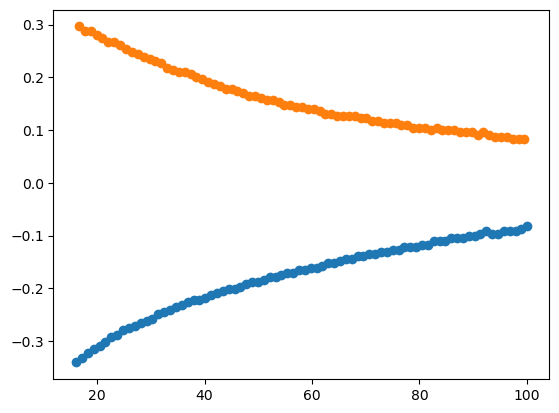

In [11]:
from math import isnan
Xs, Ys = runData([3], 1)
Xs, Ys = Xs[16_000:100_000], Ys[16_000:100_000]
# plt.plot(Xs, Ys)
XMs, YMs = massimi(Xs, Ys)
Xms, Yms = minimi(Xs, Ys)
XMs, YMs = XMs[1:], YMs[1:]
_Mbl = [y for y in YMs if not isnan(y)][-1]
_mbl = [y for y in Yms if not isnan(y)][-1]
baseline = (_Mbl + _mbl)/2
YMs = [y - baseline for y in YMs]
Yms = [y - baseline for y in Yms]
# print(Xs, Ys)
plt.scatter(Xms, Yms)
plt.scatter(XMs, YMs)
plt.show()

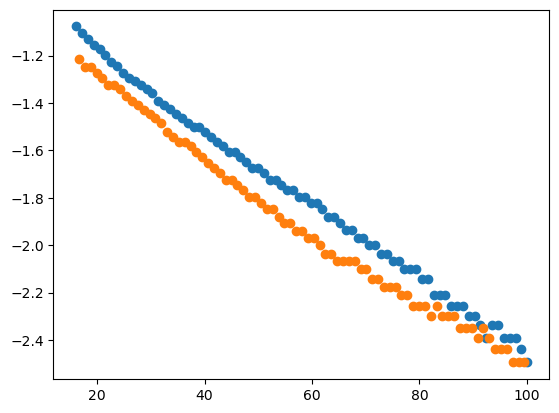

In [12]:
from math import log
LogYMs = [log(y) for y in YMs]
LogYms = [log(-y) for y in Yms]

pd.DataFrame({
    "Tempi (p3d1)": XMs,
    "Picchi (p3d1)": LogYMs,
}).to_csv("picchi.csv")
plt.scatter(Xms, LogYms)
plt.scatter(XMs, LogYMs)
plt.show()